In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot 


In [4]:
df = pd.read_csv("Carseats.csv")
Sales = df["Sales"]
CompPrice = df["CompPrice"]
Income = df["Income"]
Advertising = df["Advertising"]
Population = df["Population"]
Price = df["Price"]
ShelveLoc = df["ShelveLoc"]
Age = df["Age"]
Education = df["Education"]
Urban = df["Urban"]
US = df["US"]
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [1]:
data = [go.Histogram(
        x = df.Sales,
        xbins = {'start': 0, 'size': 1, 'end' :20}
)]

# iplot(data)

NameError: name 'go' is not defined

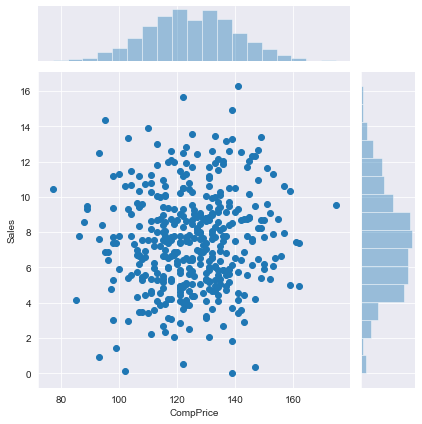

In [5]:
sns.set_style("darkgrid")
ax = sns.jointplot(df['CompPrice'], df['Sales'])

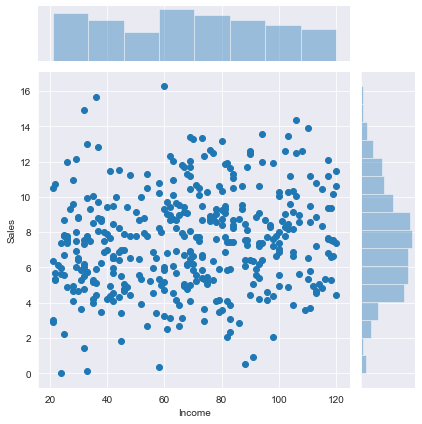

In [6]:
sns.set_style("darkgrid")
ax = sns.jointplot(df['Income'], df['Sales'])

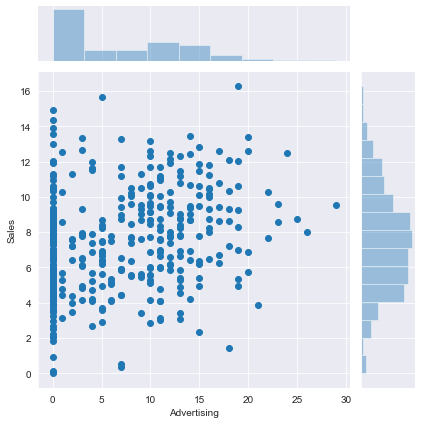

In [7]:
sns.set_style("darkgrid")
ax = sns.jointplot(df['Advertising'], df['Sales'])

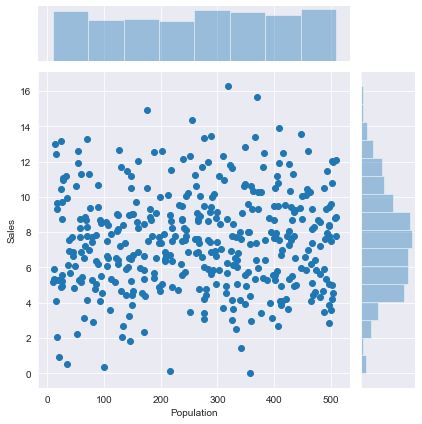

In [8]:
sns.set_style("darkgrid")
ax = sns.jointplot(df['Population'], df['Sales'])

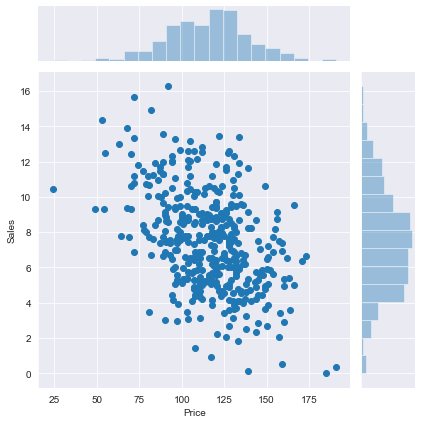

In [9]:
sns.set_style("darkgrid")
ax = sns.jointplot(df['Price'], df['Sales'])

Text(0.5, 1.0, 'ShelveLoc VS Sales')

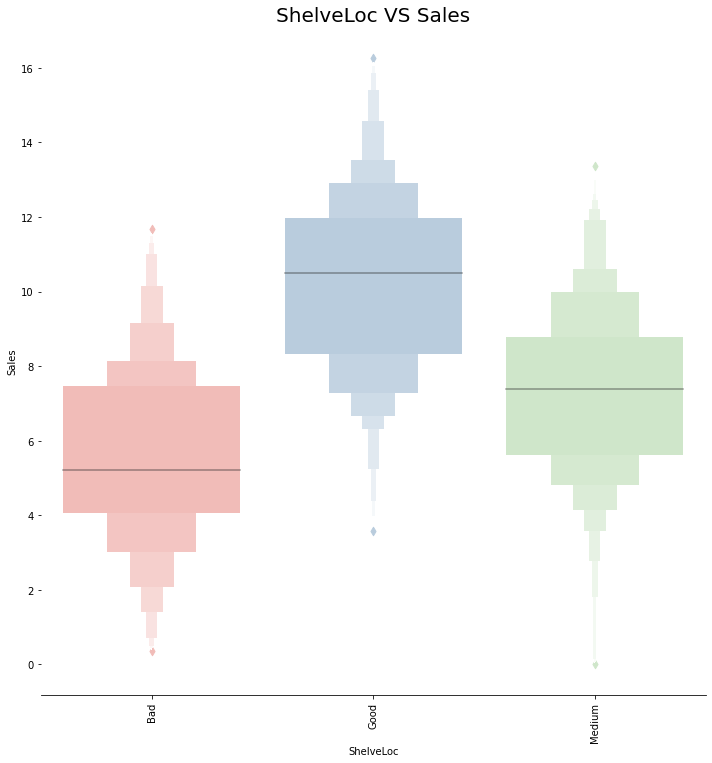

In [7]:
g = sns.catplot(x="ShelveLoc",y="Sales",data=df, kind="boxen", height = 10 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Sales")
plt.title('ShelveLoc VS Sales',size = 20)

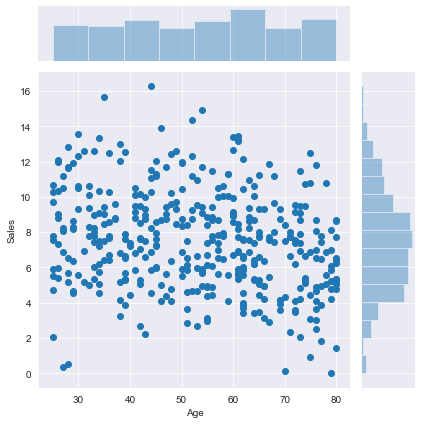

In [11]:
sns.set_style("darkgrid")
ax = sns.jointplot(df['Age'], df['Sales'])

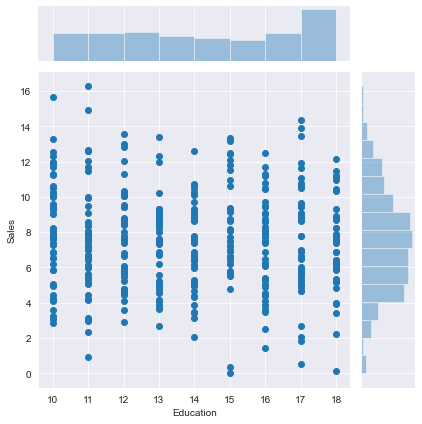

In [12]:
sns.set_style("darkgrid")
ax = sns.jointplot(df['Education'], df['Sales'])

Text(0.5, 1.0, 'Price VS Sales')

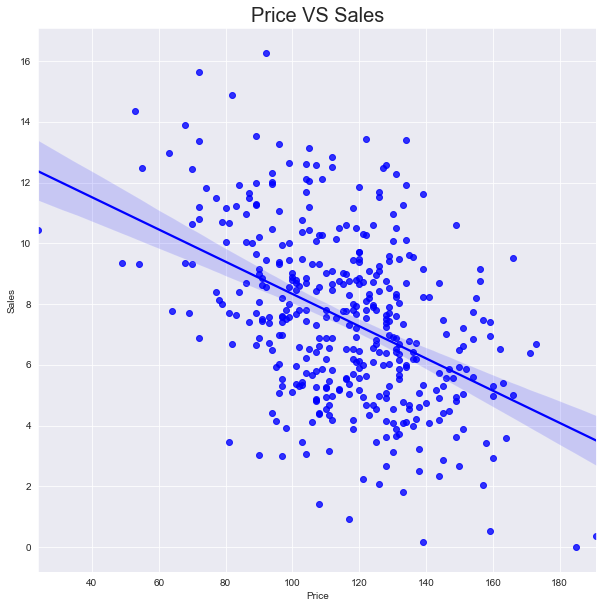

In [13]:
plt.figure(figsize = (10,10))
sns.regplot(x=df["Price"], y=df["Sales"], color = 'blue')
plt.title('Price VS Sales',size = 20)

In [49]:
dc_US = pd.get_dummies(US)
dc_SL = pd.get_dummies(ShelveLoc)
dc_Ub = pd.get_dummies(Urban)
train_X = pd.concat([CompPrice, Income, Advertising, Population, Price, dc_SL, Age, Education, dc_Ub, dc_SL], axis=1)
train_y = df['Sales']
train_X, train_y

(     CompPrice  Income  Advertising  Population  Price  Bad  Good  Medium  \
 0          138      73           11         276    120    1     0       0   
 1          111      48           16         260     83    0     1       0   
 2          113      35           10         269     80    0     0       1   
 3          117     100            4         466     97    0     0       1   
 4          141      64            3         340    128    1     0       0   
 ..         ...     ...          ...         ...    ...  ...   ...     ...   
 395        138     108           17         203    128    0     1       0   
 396        139      23            3          37    120    0     0       1   
 397        162      26           12         368    159    0     0       1   
 398        100      79            7         284     95    1     0       0   
 399        134      37            0          27    120    0     1       0   
 
      Age  Education  No  Yes  Bad  Good  Medium  
 0     42  

In [54]:
def Bin2Int(data):
    if data == 'Yes':
        return 1
    else:
        return 0
dc_US = US.map(Bin2Int)
dc_Ub = Urban.map(Bin2Int)

def MultiClass2Int(data):
    if data == 'Bad':
        return 0
    elif data == 'Medium':
        return 1
    else:
        return 2
dc_SL = ShelveLoc.map(MultiClass2Int)

In [55]:
dc_SL

0      0
1      2
2      1
3      1
4      0
      ..
395    2
396    1
397    1
398    0
399    2
Name: ShelveLoc, Length: 400, dtype: int64

Text(0.5, 1.0, 'Urban VS Sales')

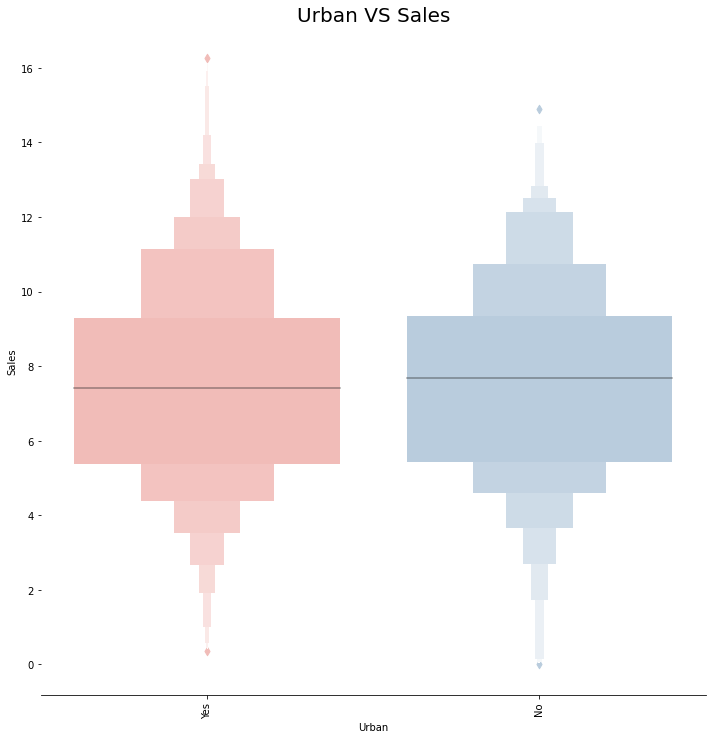

In [5]:
g = sns.catplot(x="Urban",y="Sales",data=df, kind="boxen", height = 10 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Sales")
plt.title('Urban VS Sales',size = 20)

Text(0.5, 1.0, 'US VS Sales')

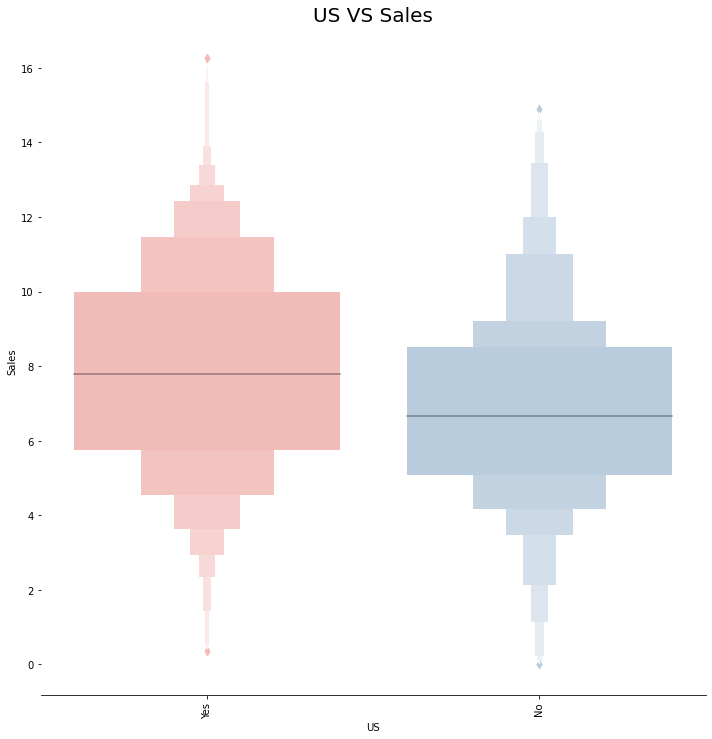

In [6]:
g = sns.catplot(x="US",y="Sales",data=df, kind="boxen", height = 10 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Sales")
plt.title('US VS Sales',size = 20)